# Sales Prediction
Predicting the sales of an E-Commerce Business.

In [1]:
# Importion the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,7)

In [3]:
# Reading the dataset.
sales_df = pd.read_excel('sales_data_sample.xlsx')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
region_df = pd.read_excel('sales_data_sample2.xlsx')
region_df.head()

,Customer ID,State,Region
0,CG-12520,Kentucky,South
1,CG-12520,Kentucky,South
2,DV-13045,California,West
3,SO-20335,Florida,South
4,SO-20335,Florida,South


In [5]:
# Merging the datasets.
df = pd.merge(sales_df, region_df, how='left', on='Customer ID')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,State,Region
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Kentucky,South
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Kentucky,South
2,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Texas,Central
3,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Texas,Central
4,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Texas,Central


# Exploring the dataset.

In [6]:
df.shape

(156816, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156816 entries, 0 to 156815
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Row ID         156816 non-null  int64         
 1   Order ID       156816 non-null  object        
 2   Order Date     156816 non-null  datetime64[ns]
 3   Ship Date      156816 non-null  datetime64[ns]
 4   Ship Mode      156816 non-null  object        
 5   Customer ID    156816 non-null  object        
 6   Customer Name  156816 non-null  object        
 7   Segment        156816 non-null  object        
 8   Country        156816 non-null  object        
 9   City           156816 non-null  object        
 10  Postal Code    156816 non-null  int64         
 11  Product ID     156816 non-null  object        
 12  Category       156816 non-null  object        
 13  Sub-Category   156816 non-null  object        
 14  Product Name   156816 non-null  object        
 15  

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'State', 'Region'],
      dtype='object')

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,156816.000000,156816.000000,156816.000000,156816.000000,156816.000000,156816.000000
mean,5002.522026,55343.009400,229.028815,3.787790,0.155867,29.004349
std,2865.369084,32032.788017,616.143805,2.224375,0.206701,225.160180
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2561.000000,23223.000000,17.220000,2.000000,0.000000,1.724800
50%,5005.000000,56430.500000,53.970000,3.000000,0.200000,8.685500
75%,7466.000000,90008.000000,209.940000,5.000000,0.200000,29.600000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Checking whether the dataset has any null values.
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
Postal Code      0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
State            0
Region           0
dtype: int64

In [11]:
continuous_features = [feature for feature in df.columns if df[feature].dtype!='O']
continuous_features

['Row ID',
 'Order Date',
 'Ship Date',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

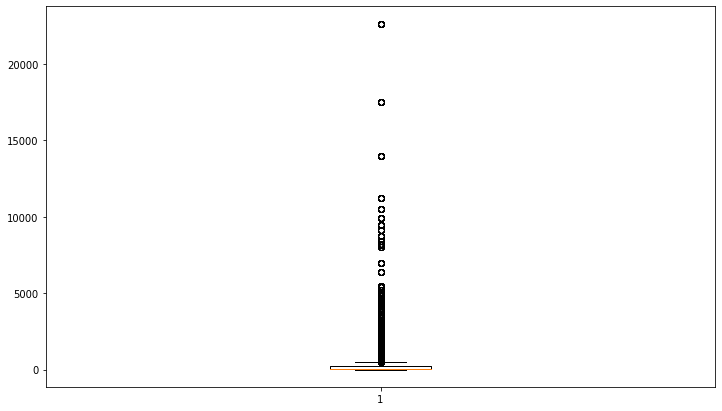

In [12]:
plt.boxplot(df['Sales'])
plt.show()

# Exploratory Data Analysis.

(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

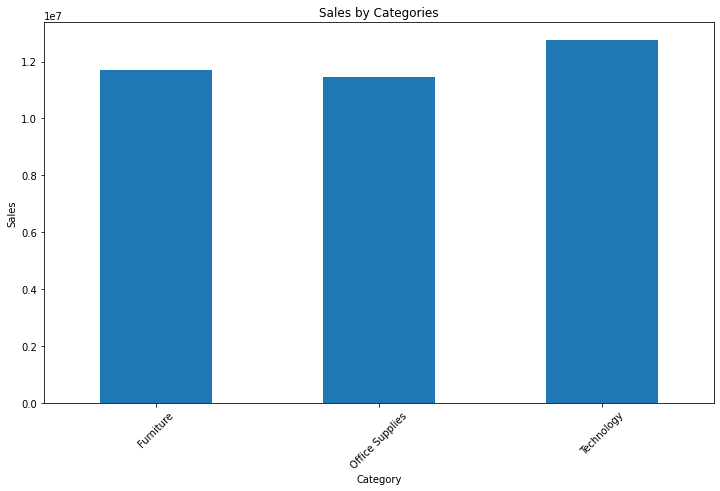

In [13]:
df.groupby('Category')['Sales'].sum().plot.bar()
plt.title('Sales by Categories')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)

### Observation : Compared to other categories Technology has made the highest Sales.

In [14]:
values = df['Sub-Category'].value_counts().values
labels = df['Sub-Category'].value_counts().index

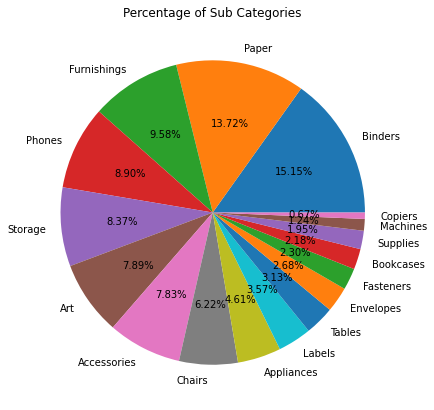

In [15]:
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Percentage of Sub Categories')
plt.show()

### Observation : Sub Category like Binders and Paper have the most occurance.

Text(0.5, 1.0, 'Sales of the categories made by the different segments')

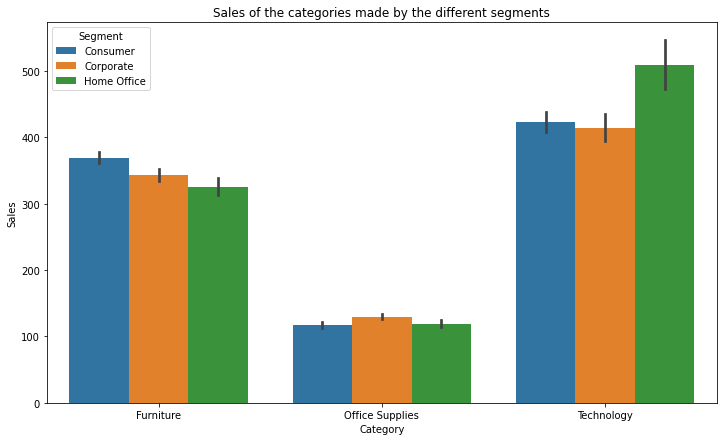

In [16]:
sns.barplot(x='Category', y='Sales', hue='Segment', data=df)
plt.title('Sales of the categories made by the different segments')

### Observation : Home Office segment has made the highest technology sales.

Text(0.5, 1.0, 'Discount by Segment')

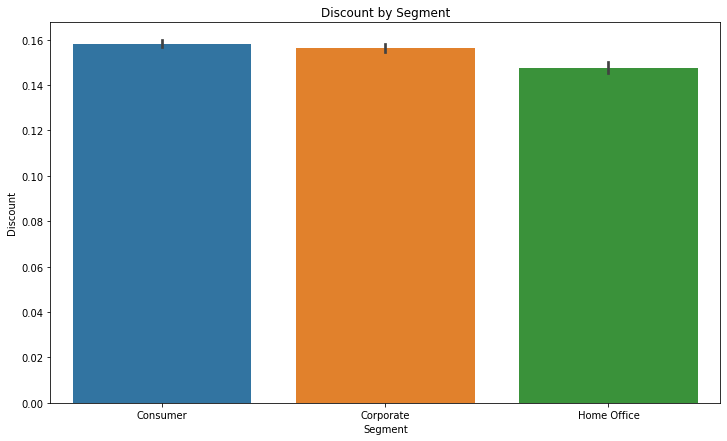

In [17]:
sns.barplot(df['Segment'], df['Discount'])
plt.title('Discount by Segment')

Text(0.5, 1.0, 'Discount by Category')

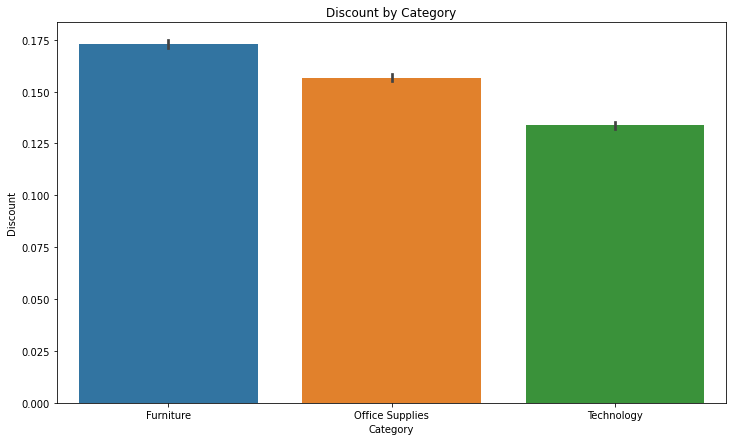

In [18]:
sns.barplot(df['Category'], df['Discount'])
plt.title('Discount by Category')

### Observation : Furniture category has received the highest discount.

Text(0.5, 1.0, 'Discount by Sub-Category')

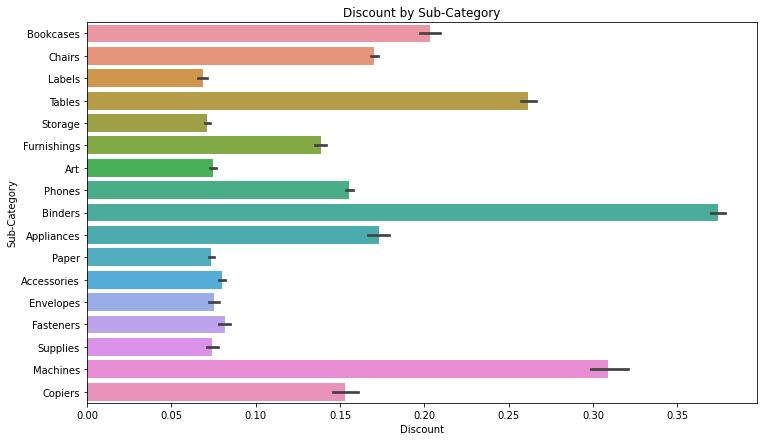

In [19]:
sns.barplot(df['Discount'], df['Sub-Category'], orient='h')
plt.title('Discount by Sub-Category')

### Observation : Binders has received highest discount among all the sub categories.

Text(0.5, 1.0, 'Sales by Sub-Category')

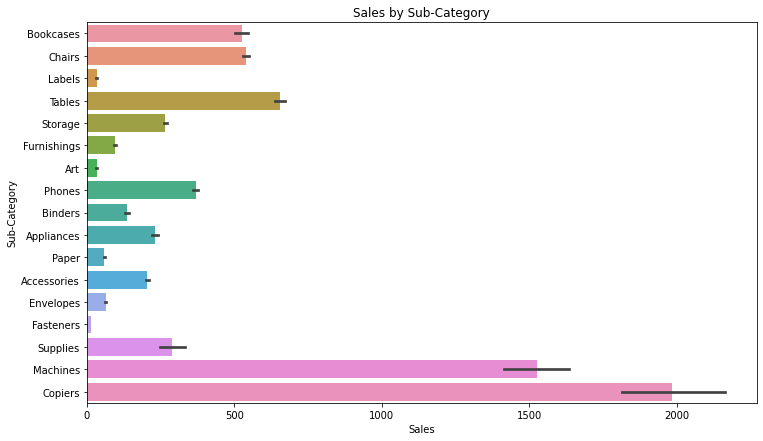

In [20]:
sns.barplot(df['Sales'], df['Sub-Category'], orient='h')
plt.title('Sales by Sub-Category')

### Observation : Copiers and Machines has made the highest sales compared to all Sub Categories.

Text(0.5, 1.0, 'Profit by Sub-category')

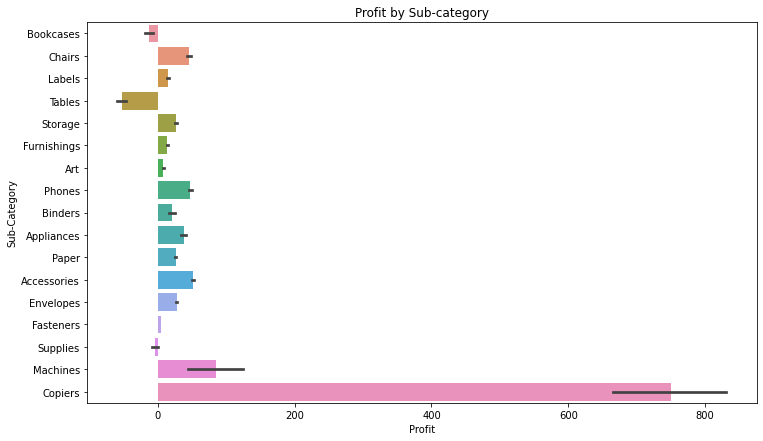

In [21]:
sns.barplot(df['Profit'], df['Sub-Category'], orient='h')
plt.title('Profit by Sub-category')

### Observation : Copiers has made highest profit.

Text(0.5, 1.0, 'Sales by Region and segment')

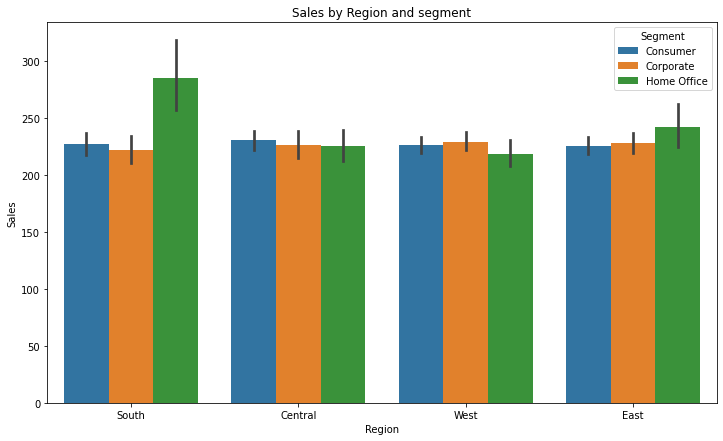

In [22]:
sns.barplot(x='Region', y='Sales', hue='Segment', data=df)
plt.title('Sales by Region and segment')

### Observation : From south region Home office are making highest sales.

Text(0.5, 1.0, 'Sales by State')

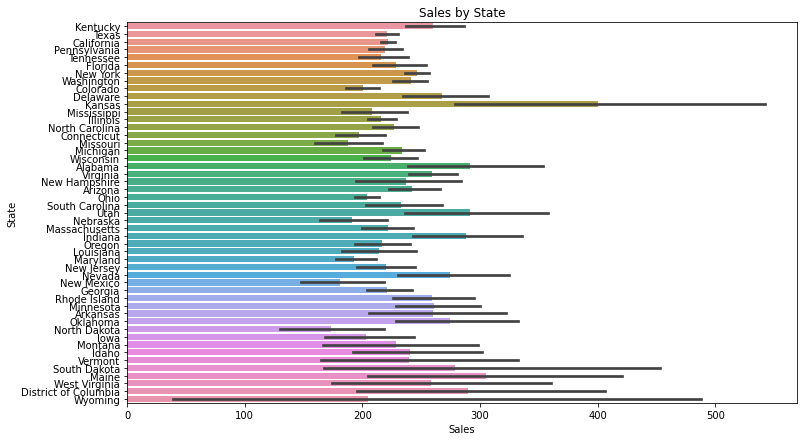

In [23]:
sns.barplot(x=df['Sales'], y=df['State'], orient='h')
plt.title('Sales by State')

Text(0.5, 1.0, 'Profit by State')

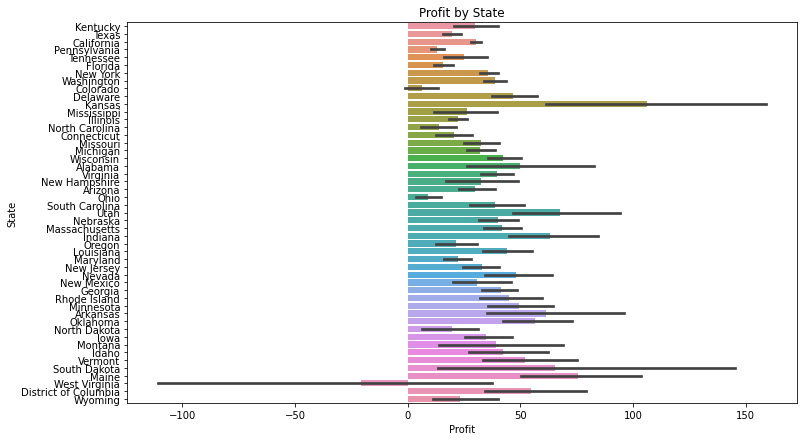

In [24]:
sns.barplot(x=df['Profit'], y=df['State'], orient='h')
plt.title('Profit by State')

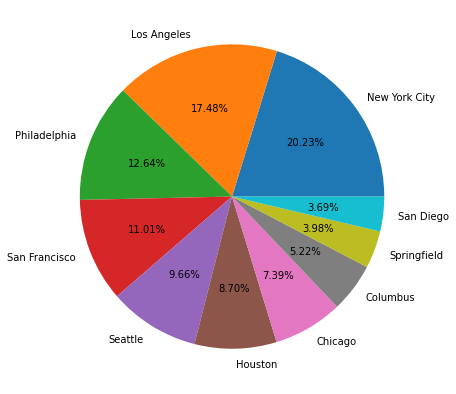

In [25]:
# Plotting pie chart for the Top 10 Cities.
values = df.City.value_counts().values
labels = df.City.value_counts().index
plt.pie(values[:10], labels=labels[:10], autopct='%1.2f%%')
plt.show()

### Observation : New York city and Los Angeles has the highest percentage of occurance.

In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'State', 'Region'],
      dtype='object')

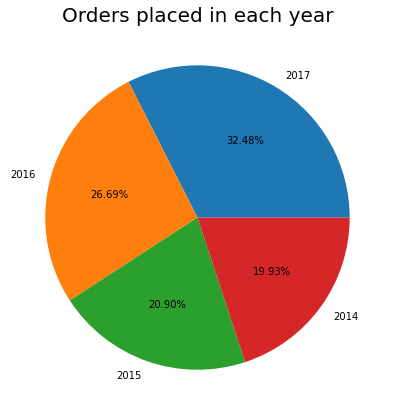

In [27]:
import datetime 
from datetime import timedelta
values = df['Order Date'].dt.year.value_counts().values
labels = df['Order Date'].dt.year.value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Orders placed in each year', fontsize=20)
plt.show()

### Observation : In 2017, more number of orders are received

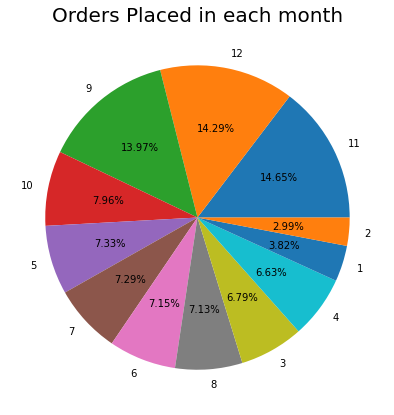

In [28]:
values = df['Order Date'].dt.month.value_counts().values
labels = df['Order Date'].dt.month.value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Orders Placed in each month', fontsize=20)
plt.show()

### Observation : In the month of September, November and December most number of orders are placed compared to the other months.

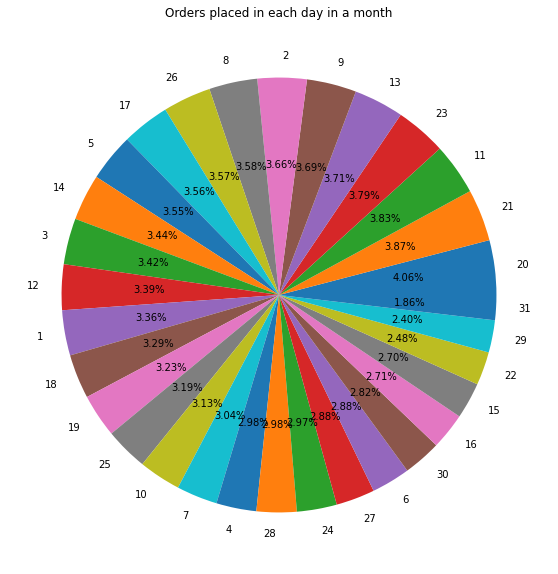

In [29]:
plt.figure(figsize=(13,10))
values = df['Order Date'].dt.day.value_counts().values
labels = df['Order Date'].dt.day.value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Orders placed in each day in a month')
plt.show()

Text(0.5, 1.0, 'Total sales made by segments for each month ')

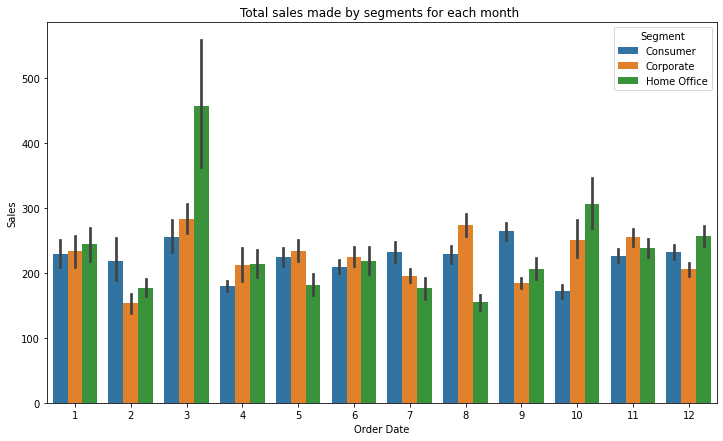

In [30]:
sns.barplot(x=df['Order Date'].dt.month, y=df['Sales'], hue=df['Segment'])
plt.title('Total sales made by segments for each month ')

### Observation : Home office has made highest sales in the month of march.

Text(0.5, 1.0, 'Total sales made by the segments for each year')

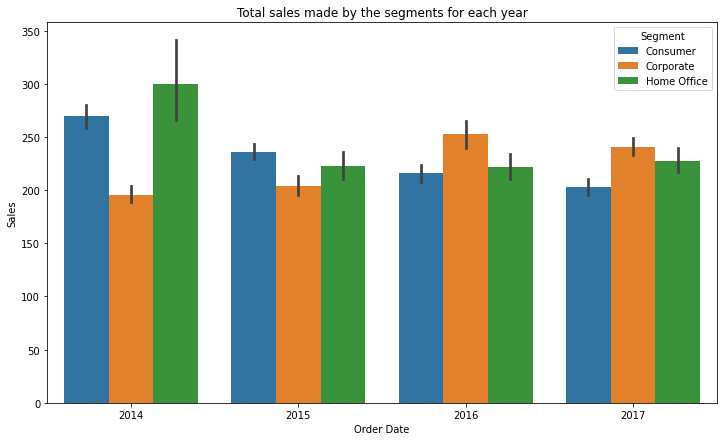

In [31]:
sns.barplot(x=df['Order Date'].dt.year, y=df['Sales'], hue=df['Segment'])
plt.title('Total sales made by the segments for each year')

### Observation : In 2014, Home office has made the highest sales.

Text(0.5, 1.0, 'Profit made for each month')

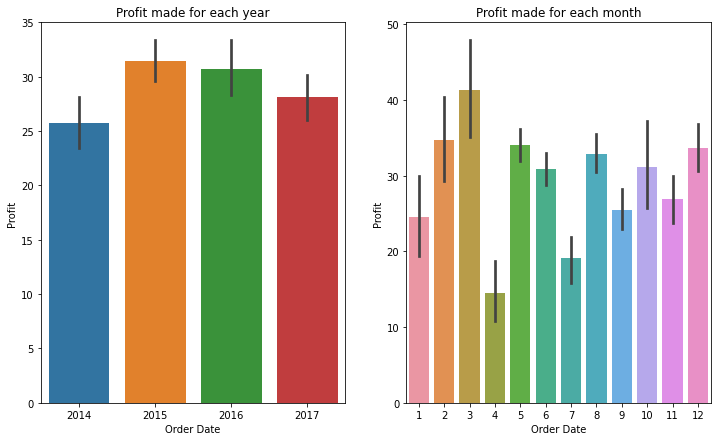

In [32]:
plt.subplot(1,2,1)
sns.barplot(x=df['Order Date'].dt.year, y=df['Profit'])
plt.title('Profit made for each year')
plt.subplot(1,2,2)
sns.barplot(x=df['Order Date'].dt.month, y=df['Profit'])
plt.title('Profit made for each month')

Text(0.5, 1.0, 'Sales made for each month')

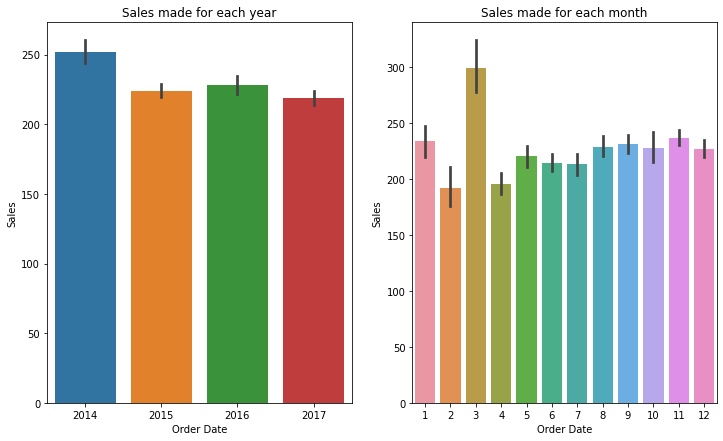

In [33]:
plt.subplot(1,2,1)
sns.barplot(x=df['Order Date'].dt.year, y=df['Sales'])
plt.title('Sales made for each year')
plt.subplot(1,2,2)
sns.barplot(x=df['Order Date'].dt.month, y=df['Sales'])
plt.title('Sales made for each month')

### Observation : Most of the sales were made in the month of march and in the year 2014.

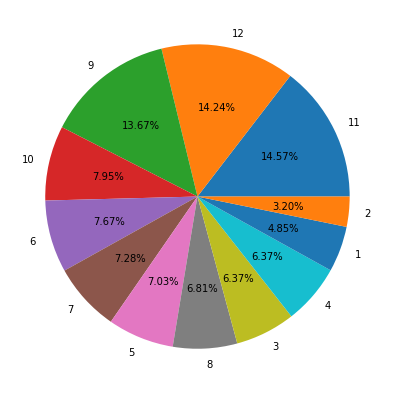

In [34]:
values = df['Ship Date'].dt.month.value_counts().values
labels = df['Ship Date'].dt.month.value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.show()

Text(0.5, 1.0, 'Total sales made in region for each month')

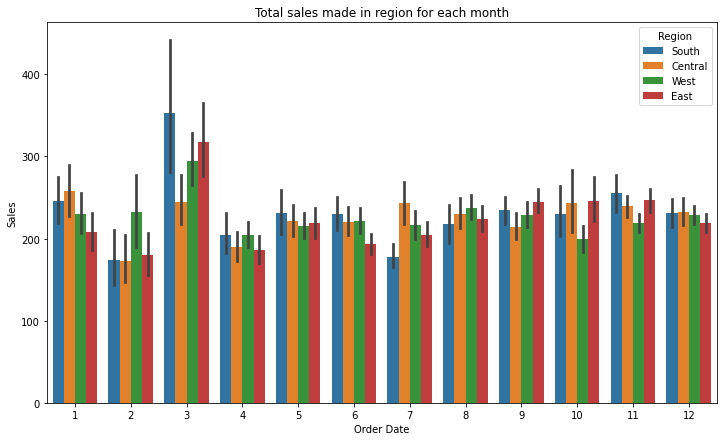

In [35]:
sns.barplot(x=df['Order Date'].dt.month, y=df['Sales'], hue=df['Region'])
plt.title('Total sales made in region for each month')

### Observation : Most number of orders are placed in the South, West and East Region in the month of March.

Text(0.5, 1.0, 'Total sales made by category in each year')

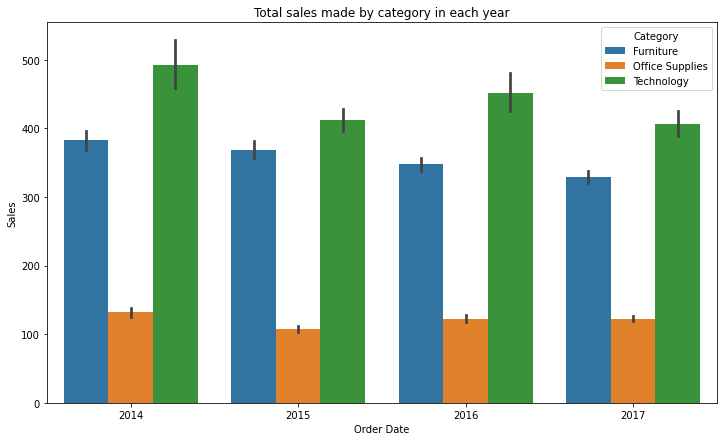

In [36]:
sns.barplot(x=df['Order Date'].dt.year, y=df['Sales'], hue=df['Category'])
plt.title('Total sales made by category in each year')

### Observation : Technology has made the highest Sales in all the years and Furniture has made the least sales.

Text(0.5, 1.0, 'Total sales by sub-category in each year')

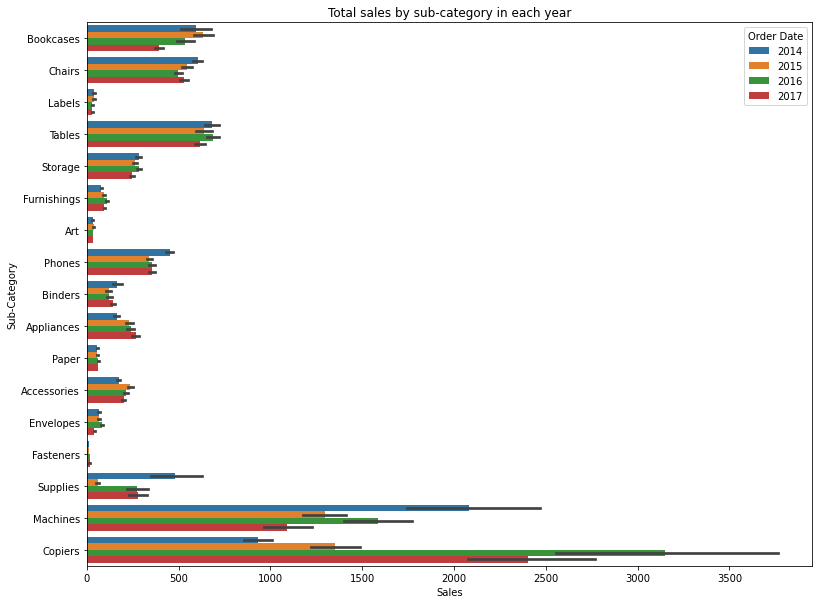

In [37]:
plt.figure(figsize=(13,10))
sns.barplot(x=df['Sales'], y=df['Sub-Category'], hue=df['Order Date'].dt.year)
plt.title('Total sales by sub-category in each year')

### Observation : Copiers has made the highest sale in the year 2016 and fastners has made the least sales for all the years.

Text(0.5, 1.0, 'Profit made by the Categories')

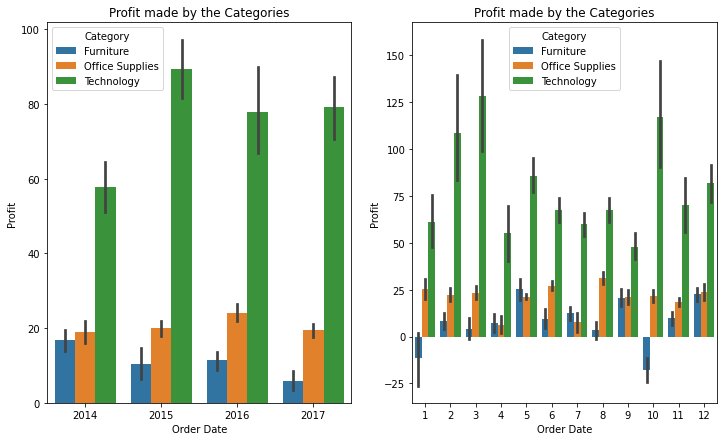

In [38]:
plt.subplot(1,2,1)
sns.barplot(x=df['Order Date'].dt.year, y=df['Profit'], hue=df['Category'])
plt.title('Profit made by the Categories')
plt.subplot(1,2,2)
sns.barplot(x=df['Order Date'].dt.month, y=df['Profit'], hue=df['Category'])
plt.title('Profit made by the Categories')

### Observation : Technology has made highest profit for all the years and Furniture has made a loss in the month of January and October.

In [39]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

Customer Name
Ken Lonsdale     411081.641
Sean Miller      375645.750
Seth Vernon      367070.400
Greg Tran        342783.480
John Lee         333197.382
Edward Hooks     329948.160
Sanjit Chand     311131.348
Clay Ludtke      304655.288
Adrian Barton    289471.420
Raymond Buch     272112.102
Name: Sales, dtype: float64

### Observation : Ken Lonsdale customer has made the highest sales.

In [40]:
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

Customer Name
Sanjit Chand       126663.0618
Raymond Buch       125569.7262
Adrian Barton      108896.1100
Tamara Chand       107775.8868
Keith Dawkins       85081.5112
Brian Moss          63779.0649
Greg Tran           62739.3801
Hunter Lopez        61846.7212
Clay Ludtke         54145.9268
Laura Armstrong     53537.1174
Name: Profit, dtype: float64

### Observation : Sanjit Chand customer has made the maximum profit for the business.

<AxesSubplot:>

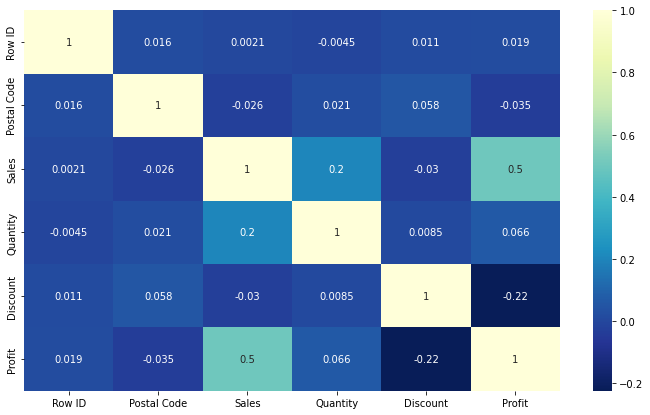

In [41]:
# Plotting heatmap for the each continuous variables
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.YlGnBu_r)

In [42]:
categorical = [feature for feature in df.columns if df[feature].dtype=='O']
categorical

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'State',
 'Region']

In [43]:
for col in categorical:
    print(col,':',len(df[col].unique()),'labels')

Order ID : 5009 labels
Ship Mode : 4 labels
Customer ID : 793 labels
Customer Name : 793 labels
Segment : 3 labels
Country : 1 labels
City : 531 labels
Product ID : 1862 labels
Category : 3 labels
Sub-Category : 17 labels
Product Name : 1850 labels
State : 49 labels
Region : 4 labels


### Hypothesis testing for Quantity

In [44]:
from statsmodels.stats.weightstats import ztest as ztest
population_mean = df['Quantity'].mean()
population_std = df['Quantity'].std()
sample_length = 40
sample_size = np.random.choice(df['Quantity'], sample_length)
sample_mean = np.mean(sample_size)
significance_value = 0.05

In [45]:
print('Population mean is', population_mean)
print('Population std is', population_std)
print('Sample mean is', sample_mean)

Population mean is 3.78778951127436
Population std is 2.224374828625474
Sample mean is 3.5


H0 = mean = 3.78

H1 = mean != 3.78

In [46]:
_,p_value = ztest(sample_size, value=3.78)
print(p_value)

0.4295647332358906


In [47]:
if p_value<significance_value:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Failed to Reject Null Hypothesis


### Hypothesis testing for profit

In [48]:
population_mean = df['Profit'].mean()
population_std = df['Profit'].std()
sample_size = 60
sample_data = np.random.choice(df['Profit'], sample_size)
sample_mean = np.mean(sample_data)
significance_value = 0.05

In [49]:
print(population_mean)

29.004348674878994


In [50]:
_,p_value = ztest(sample_data, value=29.00)
print(p_value)

0.09167833528465423


In [51]:
if p_value<significance_value:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Failed to Reject the Null Hypothesis


# Feature Engineering.

In [52]:
categorical

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'State',
 'Region']

In [53]:
top_10 = [x for x in df['State'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['California',
 'New York',
 'Texas',
 'Pennsylvania',
 'Washington',
 'Illinois',
 'Ohio',
 'Florida',
 'Michigan',
 'North Carolina']

In [54]:
for variable in top_10:
    df[variable] = np.where(df['State']==variable,1,0)

In [55]:
df['Ship Mode'].value_counts()

Standard Class    93770
Second Class      30603
First Class       23666
Same Day           8777
Name: Ship Mode, dtype: int64

In [56]:
df['Ship Mode'] = df['Ship Mode'].map({'Standard Class':1, 'Second Class':2, 'First Class':3, 'Same Day':4})
df['Ship Mode']

0         2
1         2
2         2
3         2
4         2
         ..
156811    2
156812    2
156813    2
156814    2
156815    2
Name: Ship Mode, Length: 156816, dtype: int64

In [57]:
df.drop(['Country','State'], axis=1, inplace=True)

In [58]:
df.drop(['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Product ID'], axis=1 ,inplace=True)

In [59]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

Ship Mode : 4 labels
Segment : 3 labels
City : 531 labels
Postal Code : 631 labels
Category : 3 labels
Sub-Category : 17 labels
Product Name : 1850 labels
Sales : 6144 labels
Quantity : 14 labels
Discount : 12 labels
Profit : 7545 labels
Region : 4 labels
California : 2 labels
New York : 2 labels
Texas : 2 labels
Pennsylvania : 2 labels
Washington : 2 labels
Illinois : 2 labels
Ohio : 2 labels
Florida : 2 labels
Michigan : 2 labels
North Carolina : 2 labels


In [60]:
top_10 = [x for x in df['City'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['New York City',
 'Los Angeles',
 'Philadelphia',
 'San Francisco',
 'Seattle',
 'Houston',
 'Chicago',
 'Columbus',
 'Springfield',
 'San Diego']

In [61]:
for category in top_10:
    df[category] = np.where(df['City']==category,1,0)

In [62]:
top_10 = [x for x in df['Sub-Category'].value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    df[label] = np.where(df['Sub-Category']==label,1,0)

In [63]:
category = pd.get_dummies(df['Category'], drop_first=True)

In [64]:
segment = pd.get_dummies(df['Segment'], drop_first=True)

In [65]:
region = pd.get_dummies(df['Region'], drop_first=True)

In [66]:
df = pd.concat([df, category, segment, region], axis=1)

In [67]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'Postal Code', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Region', 'California', 'New York', 'Texas', 'Pennsylvania',
       'Washington', 'Illinois', 'Ohio', 'Florida', 'Michigan',
       'North Carolina', 'New York City', 'Los Angeles', 'Philadelphia',
       'San Francisco', 'Seattle', 'Houston', 'Chicago', 'Columbus',
       'Springfield', 'San Diego', 'Binders', 'Paper', 'Furnishings', 'Phones',
       'Storage', 'Art', 'Accessories', 'Chairs', 'Appliances', 'Labels',
       'Office Supplies', 'Technology', 'Corporate', 'Home Office', 'East',
       'South', 'West'],
      dtype='object')

In [68]:
df.drop(['Sub-Category','Segment','Region','Category','Postal Code','Product Name','City'], axis=1, inplace=True)

In [69]:
# Converting uint dtype to int dtype.
for feature in df.columns:
    if df[feature].dtype=='uint8':
        df[feature] = df[feature].astype('int')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156816 entries, 0 to 156815
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Ship Mode        156816 non-null  int64  
 1   Sales            156816 non-null  float64
 2   Quantity         156816 non-null  int64  
 3   Discount         156816 non-null  float64
 4   Profit           156816 non-null  float64
 5   California       156816 non-null  int32  
 6   New York         156816 non-null  int32  
 7   Texas            156816 non-null  int32  
 8   Pennsylvania     156816 non-null  int32  
 9   Washington       156816 non-null  int32  
 10  Illinois         156816 non-null  int32  
 11  Ohio             156816 non-null  int32  
 12  Florida          156816 non-null  int32  
 13  Michigan         156816 non-null  int32  
 14  North Carolina   156816 non-null  int32  
 15  New York City    156816 non-null  int32  
 16  Los Angeles      156816 non-null  int3

<AxesSubplot:>

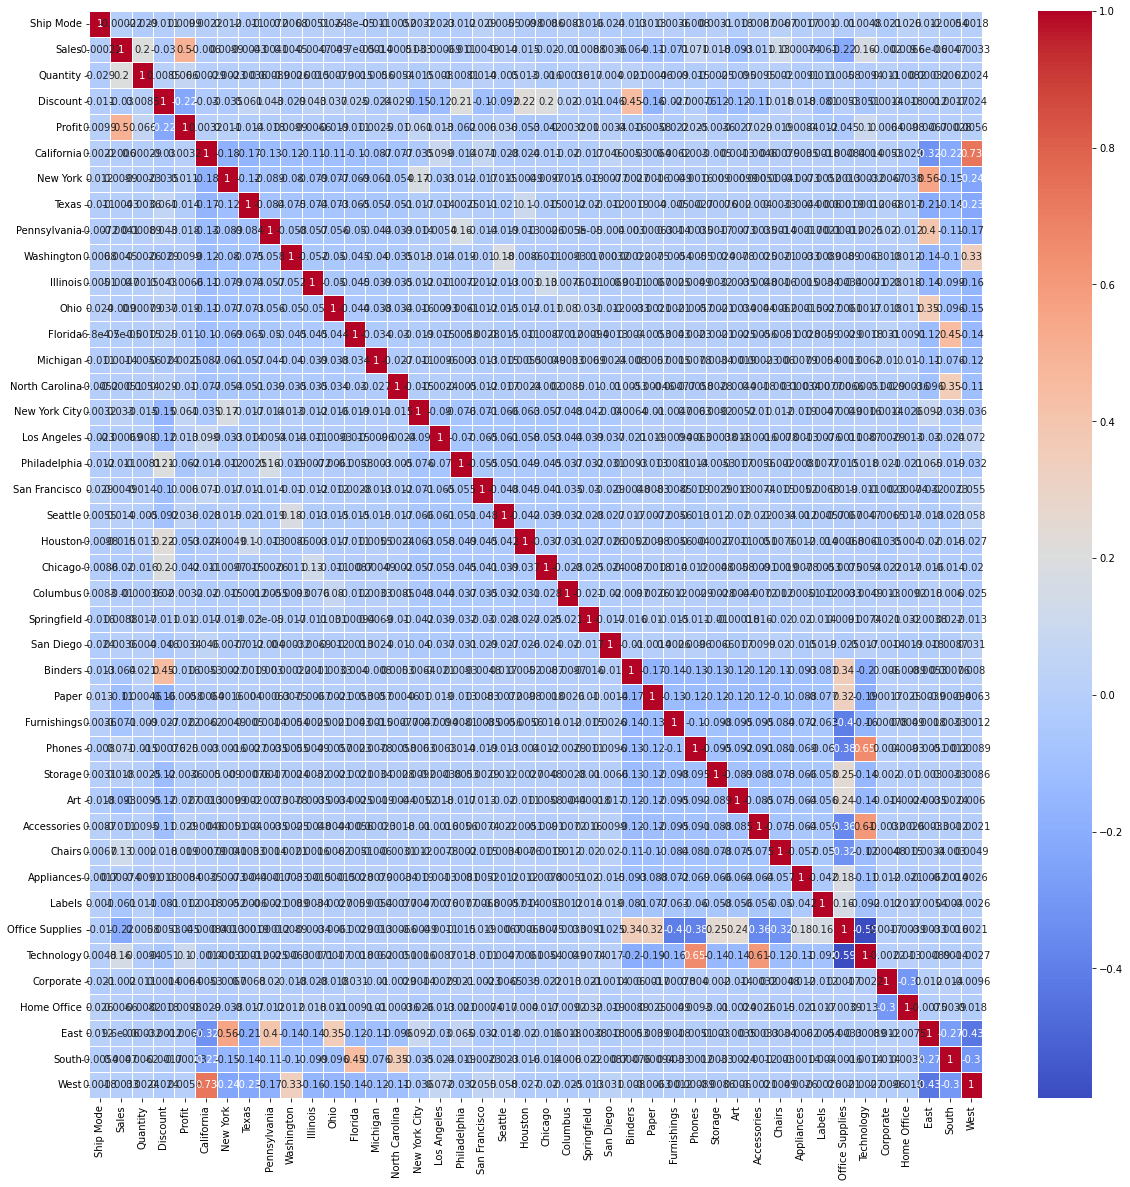

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)

In [72]:
# Dividing the dataset into Dependent and Independent variables.
X = df.drop('Sales',axis=1)
y = df['Sales']

# Feature Selection.

In [73]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_regression, k='all')
sel.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000001FD1BCE2160>)

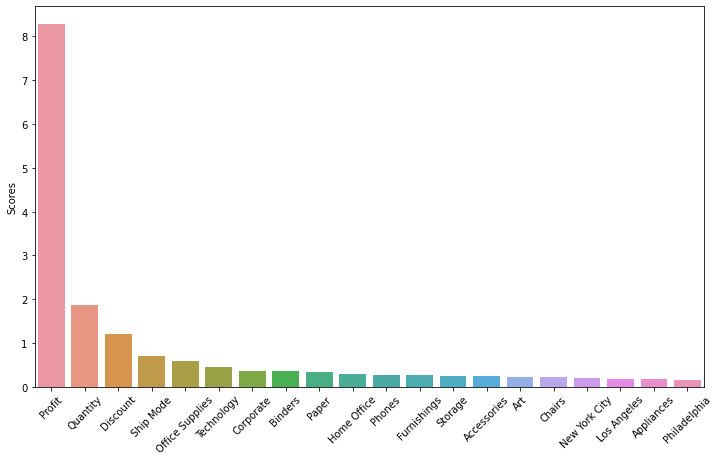

In [74]:
# Selecting Top 20 variables for training the model.
imp_feat = pd.DataFrame(sel.scores_, index=X.columns, columns=['Scores'])
top20_feature = imp_feat.nlargest(20, columns=['Scores'])
# Plotting the bar graph for the top 20 features.
sns.barplot(x=top20_feature.index, y=top20_feature['Scores'])
plt.xticks(rotation=45)
plt.show()

In [75]:
# Rearranging the columns.
X = X[top20_feature.index]
X = X[['Profit', 'Quantity', 'Discount', 'Ship Mode','Office Supplies',
       'Technology','Corporate','Home Office','Binders', 'Paper',
      'Phones','Furnishings', 'Storage', 'Accessories', 'Art', 'Chairs',
      'Appliances','New York City', 'Los Angeles','Philadelphia']]

In [76]:
# Renaming the columns.
X.rename(columns=lambda x: x.lower().replace(' ','_'), inplace=True)
X.columns

Index(['profit', 'quantity', 'discount', 'ship_mode', 'office_supplies',
       'technology', 'corporate', 'home_office', 'binders', 'paper', 'phones',
       'furnishings', 'storage', 'accessories', 'art', 'chairs', 'appliances',
       'new_york_city', 'los_angeles', 'philadelphia'],
      dtype='object')

# Train Test Split.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation.

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_lin = lin_reg.predict(X_test)

In [80]:
# Score to check the performance of the model.
from sklearn.metrics import r2_score
lin_score = r2_score(y_test, y_pred_lin)
print('Linear Regression score is {}'.format(lin_score))

Linear Regression score is 0.4106067000831932


In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

In [82]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [83]:
rf_regressor.score(X_train, y_train)

0.9991825527480263

In [84]:
rf_regressor.score(X_test, y_test)

0.9984622626475091

In [85]:
y_pred_rf = rf_regressor.predict(X_test)

In [86]:
# Score to check the performance of the model.
random_forest_score = r2_score(y_test, y_pred_rf)
print('Random Forest Regression Score is {}'.format(random_forest_score))

Random Forest Regression Score is 0.9984622626475091


In [87]:
X_train.columns

Index(['profit', 'quantity', 'discount', 'ship_mode', 'office_supplies',
       'technology', 'corporate', 'home_office', 'binders', 'paper', 'phones',
       'furnishings', 'storage', 'accessories', 'art', 'chairs', 'appliances',
       'new_york_city', 'los_angeles', 'philadelphia'],
      dtype='object')

# Model Prediction.

In [88]:
def predict_sales(profit, quantity, discount, ship_mode, category, segment, city, sub_category):
    # Creating a list to capture the values.
    predict_temp = list()
    
    # Appending the profit input to the list and reshaping the values.
    predict_temp.append(np.array(profit).reshape(1, -1))
    
    # Appending the quantity input to the list and reshaping the values.
    predict_temp.append(np.array(quantity).reshape(1, -1))
    
    # Appending the discount input to the list and reshaping the values.
    predict_temp.append(np.array(discount).reshape(1, -1))
    
    ship_mode_map = {'Standard Class':1, 'Second Class':2, 'First Class':3, 'Same Day':4}
    # Appending the ship mode input to the list.
    predict_temp.append(ship_mode_map[ship_mode])
    
    category_columns = ['office_supplies','technology']
    # Creating the list of zeros. 
    temp = list(map(int, np.zeros(shape=(1, len(category_columns)))[0]))
    for index in range(0, len(category_columns)):
        if category_columns[index]==category:
            temp[index]=1
    predict_temp = predict_temp+temp
    
    segment_columns = ['corporate', 'home_office']
    temp = list(map(int, np.zeros(shape=(1, len(segment_columns)))[0]))
    for index in range(0, len(segment_columns)):
        if segment_columns[index]==segment:
            temp[index]=1
            break
    predict_temp = predict_temp+temp
    
    city_columns = ['new_york_city', 'los_angeles', 'philadelphia']
    temp = list(map(int, np.zeros(shape=(1, len(city_columns)))[0]))
    for index in range(0, len(city_columns)):
        if city_columns[index]==city:
            temp[index]=1
            break
    predict_temp = predict_temp+temp
    
    sub_category_columns = ['binders', 'paper', 'phones','furnishings', 
                        'storage', 'accessories', 'art', 'chairs', 'appliances']
    temp = list(map(int, np.zeros(shape=(1, 9))[0]))
    if 'binders' in sub_category:
        temp[0] = 1
    if 'paper' in sub_category:
        temp[1] = 1
    if 'phones' in sub_category:
        temp[2] = 1
    if 'furnishings' in sub_category:
        temp[3] = 1
    if 'storage' in sub_category:
        temp[4] = 1
    if 'accessories' in sub_category:
        temp[5] = 1
    if 'art' in sub_category:
        temp[6] = 1
    if 'chairs' in sub_category:
        temp[7] = 1
    if 'appliances' in sub_category:
        temp[8] = 1
    
    predict_temp = predict_temp+temp
    
    # Converting the inputs into array.
    predict_temp = np.array([predict_temp])
    
    # Providing all the inputs to the model to predict.
    return rf_regressor.predict(predict_temp)[0]
    

In [89]:
# Prediction 1
# Inputs : profit, quantity, discount, ship_mode, category, segment, sub_category, city.
sales = predict_sales(1500, 45, 300, 'First Class', 'technology', 'corporate', 'los_angeles', ['binders','accessories'])
print('Total sales made by the products are {}'.format(sales))

Total sales made by the products are 5866.601270000009


In [90]:
# Prediction 2
# Inputs : profit, quantity, discount, ship_mode, category, segment, sub_category, city.
sales = predict_sales(3500, 17, 200, 'Standard Class', 'technology', 'corporate', 'new_york_city', ['accessories','paper','appliances'])
print('Total sales made by the products are {}'.format(sales))

Total sales made by the products are 7295.022399999975


In [91]:
# Prediction 3
# Inputs : profit, quantity, discount, ship_mode, category, segment, sub_category, city.
sales = predict_sales(1350, 6, 450, 'Same Day', 'office_supplies', 'home_office', 'new_york_city', 'binders')
print('Total sales made by the products are {}'.format(sales))

Total sales made by the products are 5836.864770000006


In [92]:
# Prediction 4
# Inputs : profit, quantity, discount, ship_mode, category, segment, sub_category, city.
sales = predict_sales(4136, 11, 780, 'Second Class', 'technology', 'corporate', 'philadelphia', ['phones','binders','chairs'])
print('Total sales made by the products are {}'.format(sales))

Total sales made by the products are 10579.917950000014


In [93]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_regressor, file)